In [1]:
import pandas as pd
from IPython.display import display, HTML, clear_output
import os
from ipywidgets import interact, widgets
import numpy as np
import matplotlib.pyplot as plt
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [2]:
print("Input folder location")
folder = input()
files = os.listdir(folder)
#\output\results

Input folder location
E:\BP\bachelors-thesis-main\output\results


In [3]:
def add_cols_to_df(df):
    df['PROCESSORS'] = None
    df['BASE_CLOCK'] = None
    df['BOOST_CLOCK'] = None
    df['MEMORY_CONFIG'] = None
    df['INTERFACE_WIDTH'] = None
    
    for index, row in df.iterrows():
        gpu_name = row['GPU']
        match gpu_name:
            case "Radeon RX Vega":
                df.at[index, 'PROCESSORS'] = 4096
                df.at[index, 'BASE_CLOCK'] = 1.25
                df.at[index, 'BOOST_CLOCK'] = 1.55
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 2048
            case "NVIDIA GeForce GTX 1080 Ti":
                df.at[index, 'PROCESSORS'] = 3584
                df.at[index, 'BASE_CLOCK'] = 1.48
                df.at[index, 'BOOST_CLOCK'] = 1.58
                df.at[index, 'MEMORY_CONFIG'] = 11
                df.at[index, 'INTERFACE_WIDTH'] = 352
            case "NVIDIA GeForce RTX 2080 SUPER":
                df.at[index, 'PROCESSORS'] = 3072
                df.at[index, 'BASE_CLOCK'] = 1.65
                df.at[index, 'BOOST_CLOCK'] = 1.82
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 256
            case "NVIDIA GeForce RTX 3070":
                df.at[index, 'PROCESSORS'] = 5888
                df.at[index, 'BASE_CLOCK'] = 1.50
                df.at[index, 'BOOST_CLOCK'] = 1.73
                df.at[index, 'MEMORY_CONFIG'] = 8
                df.at[index, 'INTERFACE_WIDTH'] = 256
            case "NVIDIA GeForce RTX 3090":
                df.at[index, 'PROCESSORS'] = 10496
                df.at[index, 'BASE_CLOCK'] = 1.40
                df.at[index, 'BOOST_CLOCK'] = 1.70
                df.at[index, 'MEMORY_CONFIG'] = 24
                df.at[index, 'INTERFACE_WIDTH'] = 384
            case "NVIDIA RTX A4000":
                df.at[index, 'PROCESSORS'] = 6144
                df.at[index, 'BASE_CLOCK'] = 0.74
                df.at[index, 'BOOST_CLOCK'] = 1.56
                df.at[index, 'MEMORY_CONFIG'] = 16
                df.at[index, 'INTERFACE_WIDTH'] = 256
    return df


,SPEED_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.184788,-0.255561,0.449308,0.029871,0.266044,0.387220,-0.291523
MEM_USED_MEDIAN,-0.184788,1.000000,0.803345,-0.169086,-0.174435,-0.500792,-0.171884,0.769532
MEM_UTIL_MEDIAN,-0.255561,0.803345,1.000000,-0.472812,0.107401,-0.221120,-0.512983,0.527913
PROCESSORS,0.449308,-0.169086,-0.472812,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.029871,-0.174435,0.107401,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.266044,-0.500792,-0.221120,0.055271,0.691414,1.000000,-0.087469,-0.500121
MEMORY_CONFIG,0.387220,-0.171884,-0.512983,0.890509,-0.322779,-0.087469,1.000000,-0.296547
INTERFACE_WIDTH,-0.291523,0.769532,0.527913,-0.221247,-0.116461,-0.500121,-0.296547,1.000000


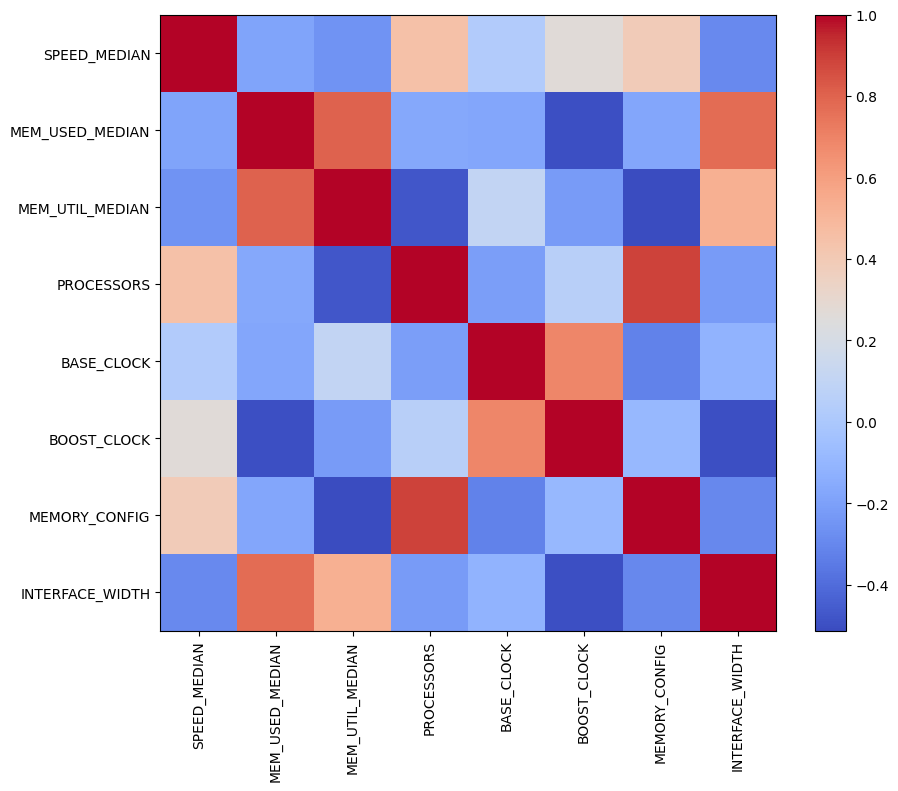

In [4]:
correlations = []
gpu_info_cols = ['GPU', 'CONFIG', 'PROCESSORS', 'BASE_CLOCK', 'BOOST_CLOCK', 'MEMORY_CONFIG', 'INTERFACE_WIDTH']

for file in files:
    path = os.path.join(folder, file)
    df = pd.read_csv(path, index_col=False)
    
    df = add_cols_to_df(df)
    
    # List all column names that have "MEDIAN" in their name
    median_cols = [col for col in df.columns if 'MEDIAN' in col]
    
    # Select GPU-related information columns and median columns
    df_to_corr = df[median_cols + gpu_info_cols]

    # Drop non-numeric columns before filling NaN values with the median
    df_to_corr = df_to_corr.drop(columns=['GPU', 'CONFIG'])

    # Fill NaN values with the median of each column
    df_to_corr = df_to_corr.fillna(df_to_corr.median())

    matrix = df_to_corr.corr()
    correlations.append(matrix)

# Convert NaN values to zeros before calculating the median
correlations_with_zeros = np.nan_to_num(np.stack(correlations), nan=0)

median_correlation = np.median(correlations_with_zeros, axis=0)
median_corr_df = pd.DataFrame(median_correlation, columns=df_to_corr.columns, index=df_to_corr.columns)

# Display the table
specific_cols = ['SPEED_MEDIAN', 'MEM_USED_MEDIAN', 'MEM_UTIL_MEDIAN', 'PROCESSORS', 'BASE_CLOCK', 'BOOST_CLOCK', 'MEMORY_CONFIG', 'INTERFACE_WIDTH']
specific_corr_df = median_corr_df.loc[specific_cols, specific_cols]
display(specific_corr_df.style.background_gradient(cmap='coolwarm'))

# Plot the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(specific_corr_df, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(specific_cols)), specific_cols, rotation=90)
plt.yticks(np.arange(len(specific_cols)), specific_cols)
plt.show()


Median Correlation Matrix for CONFIG: combinator


,SPEED_MEDIAN,UTIL_MEDIAN,TEMP_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,0.303071,0.685284,-0.630916,-0.707168,0.355332,0.808753,0.065268,0.470681,0.720805,-0.545684
UTIL_MEDIAN,0.303071,1.000000,0.147544,-0.378953,0.005822,0.449750,-0.107222,0.110042,0.141717,0.000000,-0.683556
TEMP_MEDIAN,0.685284,0.147544,1.000000,-0.664273,-0.626842,0.312091,0.440760,-0.153383,0.545545,0.432771,-0.539649
MEM_USED_MEDIAN,-0.630916,-0.378953,-0.664273,1.000000,0.746451,-0.179917,-0.276823,-0.165027,-0.623740,-0.242180,0.883902
MEM_UTIL_MEDIAN,-0.707168,0.005822,-0.626842,0.746451,1.000000,-0.019902,-0.688385,0.234496,-0.209036,-0.718013,0.394164
BUS_UTIL_MEDIAN,0.355332,0.449750,0.312091,-0.179917,-0.019902,1.000000,0.253912,0.021886,0.135368,0.393183,-0.632145
PROCESSORS,0.808753,-0.107222,0.440760,-0.276823,-0.688385,0.253912,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.065268,0.110042,-0.153383,-0.165027,0.234496,0.021886,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.470681,0.141717,0.545545,-0.623740,-0.209036,0.135368,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.720805,0.000000,0.432771,-0.242180,-0.718013,0.393183,0.890509,-0.322779,-0.087469,1.000000,-0.292292


Correlation matrix shape for CONFIG: combinator (11, 11)


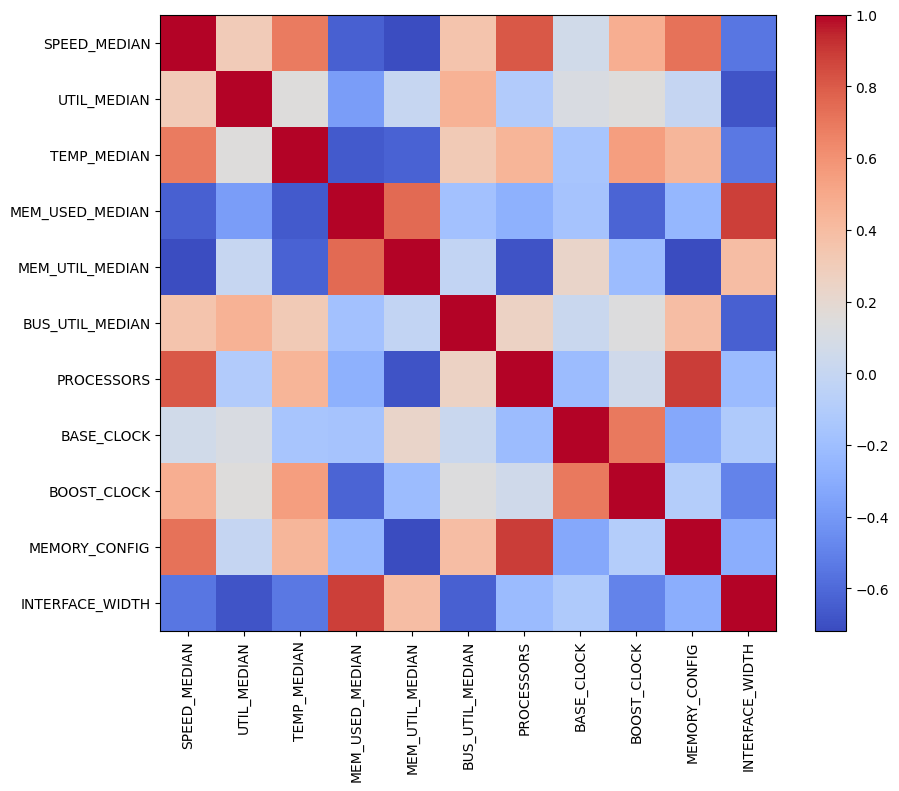

Median Correlation Matrix for CONFIG: dict3


,SPEED_MEDIAN,UTIL_MEDIAN,TEMP_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,0.000000,0.371654,-0.240014,-0.400077,0.343257,0.810588,0.046161,0.404787,0.741466,-0.434488
UTIL_MEDIAN,0.000000,1.000000,0.000000,0.000000,0.000000,0.232272,0.000000,0.000000,0.000000,0.078831,-0.054685
TEMP_MEDIAN,0.371654,0.000000,1.000000,0.000000,-0.041598,0.291967,0.267710,-0.179750,0.070861,0.454004,-0.514044
MEM_USED_MEDIAN,-0.240014,0.000000,0.000000,1.000000,0.264924,0.000000,0.000000,-0.130090,-0.344881,0.000000,0.545433
MEM_UTIL_MEDIAN,-0.400077,0.000000,-0.041598,0.264924,1.000000,0.101483,-0.535304,0.194088,0.000000,-0.678036,0.000000
BUS_UTIL_MEDIAN,0.343257,0.232272,0.291967,0.000000,0.101483,1.000000,0.192963,0.116576,0.446386,0.308761,-0.658298
PROCESSORS,0.810588,0.000000,0.267710,0.000000,-0.535304,0.192963,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.046161,0.000000,-0.179750,-0.130090,0.194088,0.116576,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.404787,0.000000,0.070861,-0.344881,0.000000,0.446386,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.741466,0.078831,0.454004,0.000000,-0.678036,0.308761,0.890509,-0.322779,-0.087469,1.000000,-0.292292


Correlation matrix shape for CONFIG: dict3 (11, 11)


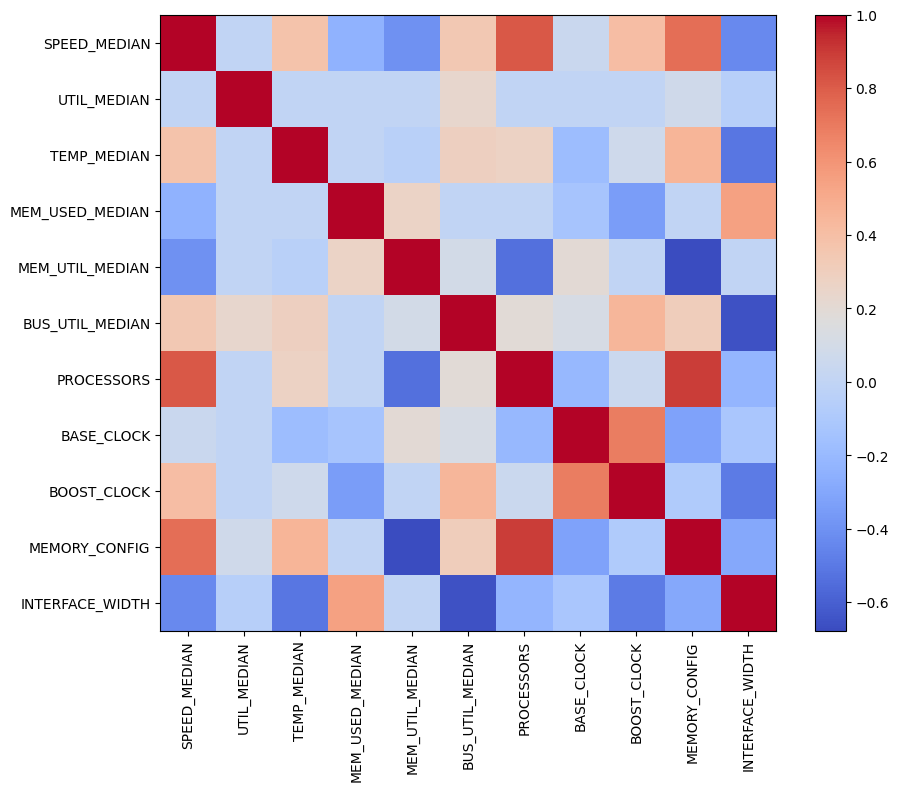

Median Correlation Matrix for CONFIG: dict4


,SPEED_MEDIAN,UTIL_MEDIAN,TEMP_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,0.167305,0.353118,-0.494877,-0.599770,0.417014,0.787236,0.167532,0.437342,0.725934,-0.543731
UTIL_MEDIAN,0.167305,1.000000,-0.056930,-0.045350,0.000000,0.374849,-0.104090,0.101001,-0.169537,0.007442,-0.119593
TEMP_MEDIAN,0.353118,-0.056930,1.000000,-0.112887,-0.190037,0.223846,0.252950,-0.255657,0.207450,0.449495,-0.442826
MEM_USED_MEDIAN,-0.494877,-0.045350,-0.112887,1.000000,0.808603,-0.745022,-0.086518,-0.196832,-0.557605,-0.127309,0.977544
MEM_UTIL_MEDIAN,-0.599770,0.000000,-0.190037,0.808603,1.000000,-0.258678,-0.474928,0.105087,-0.230157,-0.620187,0.775369
BUS_UTIL_MEDIAN,0.417014,0.374849,0.223846,-0.745022,-0.258678,1.000000,0.164261,0.109104,0.404509,0.314820,-0.778296
PROCESSORS,0.787236,-0.104090,0.252950,-0.086518,-0.474928,0.164261,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.167532,0.101001,-0.255657,-0.196832,0.105087,0.109104,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.437342,-0.169537,0.207450,-0.557605,-0.230157,0.404509,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.725934,0.007442,0.449495,-0.127309,-0.620187,0.314820,0.890509,-0.322779,-0.087469,1.000000,-0.292292


Correlation matrix shape for CONFIG: dict4 (11, 11)


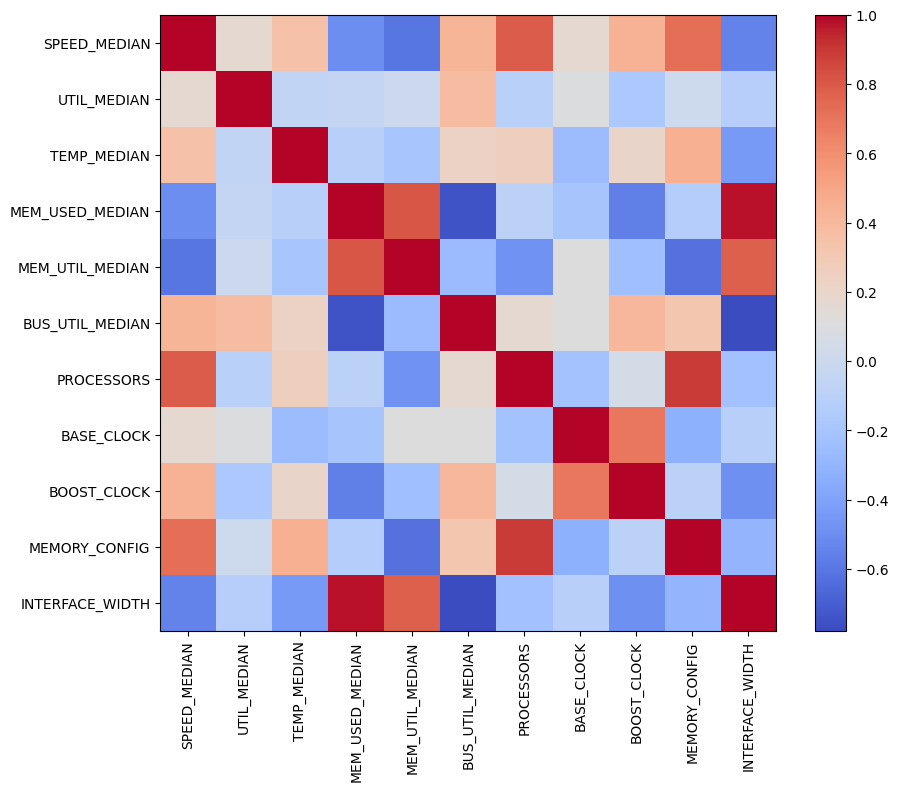

Median Correlation Matrix for CONFIG: force


,SPEED_MEDIAN,UTIL_MEDIAN,TEMP_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,0.071272,0.637658,-0.261964,-0.277006,0.000000,0.757145,0.000000,0.448279,0.624412,-0.409669
UTIL_MEDIAN,0.071272,1.000000,-0.036070,0.000000,0.000000,0.000000,0.097672,0.017534,-0.124977,0.138910,-0.229729
TEMP_MEDIAN,0.637658,-0.036070,1.000000,-0.228484,-0.288567,0.025253,0.487029,-0.357763,0.314669,0.482023,-0.307146
MEM_USED_MEDIAN,-0.261964,0.000000,-0.228484,1.000000,0.820087,0.000000,-0.192377,-0.170896,-0.518242,-0.131255,0.544107
MEM_UTIL_MEDIAN,-0.277006,0.000000,-0.288567,0.820087,1.000000,0.000000,-0.302357,0.000000,-0.110923,-0.365814,0.140001
BUS_UTIL_MEDIAN,0.000000,0.000000,0.025253,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.135623,-0.230066
PROCESSORS,0.757145,0.097672,0.487029,-0.192377,-0.302357,0.000000,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.000000,0.017534,-0.357763,-0.170896,0.000000,0.000000,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.448279,-0.124977,0.314669,-0.518242,-0.110923,0.000000,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.624412,0.138910,0.482023,-0.131255,-0.365814,0.135623,0.890509,-0.322779,-0.087469,1.000000,-0.292292


Correlation matrix shape for CONFIG: force (11, 11)


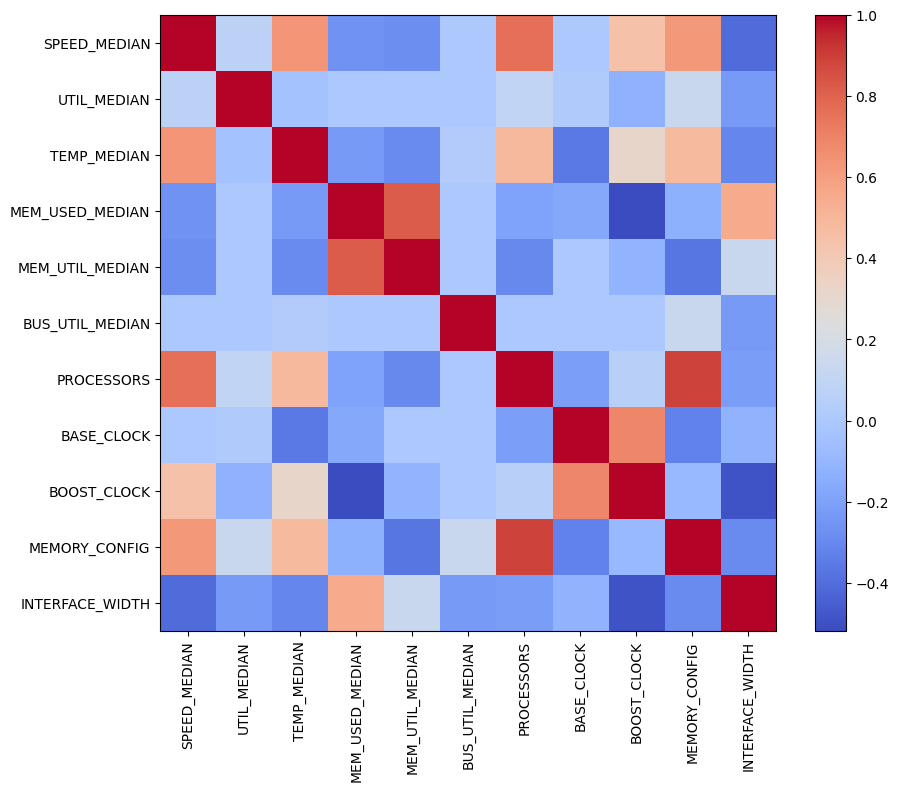

Median Correlation Matrix for CONFIG: hybrid


,SPEED_MEDIAN,UTIL_MEDIAN,TEMP_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,0.114429,0.741260,-0.457953,-0.571464,0.352263,0.800311,0.005909,0.499362,0.668831,-0.452906
UTIL_MEDIAN,0.114429,1.000000,0.000000,-0.404861,-0.151035,0.052120,-0.082049,0.042529,0.030970,0.005021,-0.565248
TEMP_MEDIAN,0.741260,0.000000,1.000000,-0.471204,-0.475109,0.356917,0.430181,-0.207788,0.527479,0.404546,-0.499509
MEM_USED_MEDIAN,-0.457953,-0.404861,-0.471204,1.000000,0.863387,-0.157316,-0.156009,-0.211784,-0.582185,-0.158786,0.920491
MEM_UTIL_MEDIAN,-0.571464,-0.151035,-0.475109,0.863387,1.000000,-0.186864,-0.429367,-0.019922,-0.369002,-0.446813,0.732072
BUS_UTIL_MEDIAN,0.352263,0.052120,0.356917,-0.157316,-0.186864,1.000000,0.415091,0.031271,0.169327,0.499690,-0.332209
PROCESSORS,0.800311,-0.082049,0.430181,-0.156009,-0.429367,0.415091,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.005909,0.042529,-0.207788,-0.211784,-0.019922,0.031271,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.499362,0.030970,0.527479,-0.582185,-0.369002,0.169327,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.668831,0.005021,0.404546,-0.158786,-0.446813,0.499690,0.890509,-0.322779,-0.087469,1.000000,-0.292292


Correlation matrix shape for CONFIG: hybrid (11, 11)


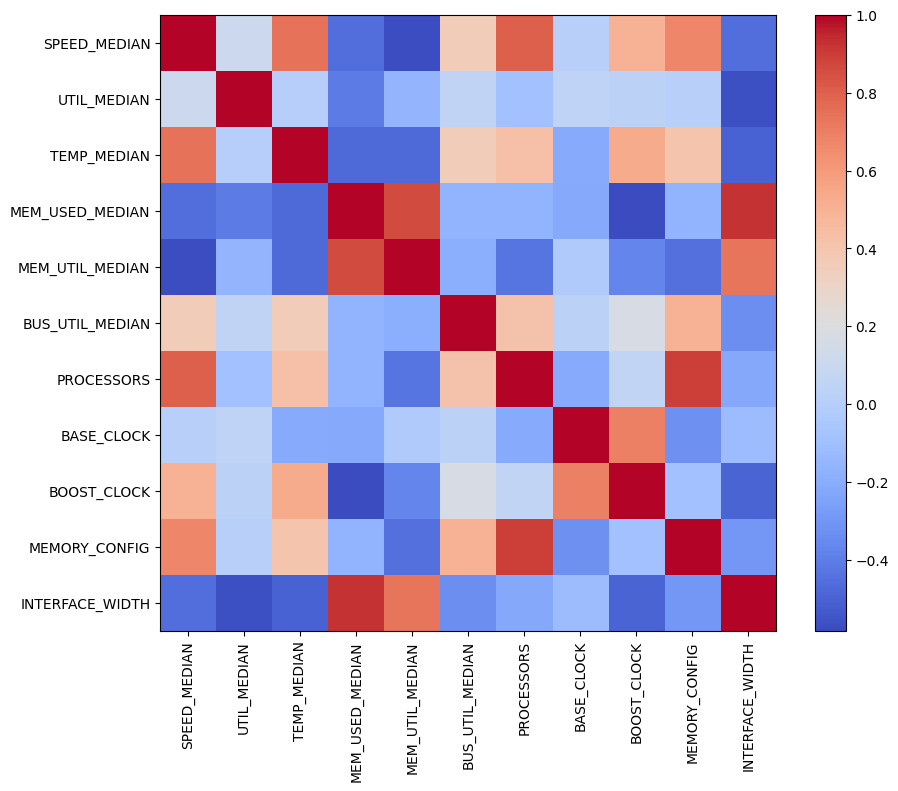

Median Correlation Matrix for CONFIG: dict1


,SPEED_MEDIAN,UTIL_MEDIAN,TEMP_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.459337,0.245629,-0.441628,-0.513873,0.124645,0.451343,-0.038073,0.425273,0.360722,-0.571570
UTIL_MEDIAN,-0.459337,1.000000,0.000000,0.419715,0.428629,0.000000,-0.154921,0.011377,-0.457765,0.000000,0.227511
TEMP_MEDIAN,0.245629,0.000000,1.000000,0.015864,-0.046928,0.222846,0.592229,-0.393935,-0.027386,0.814422,0.000000
MEM_USED_MEDIAN,-0.441628,0.419715,0.015864,1.000000,0.837463,0.000000,-0.244661,-0.135074,-0.593737,-0.032485,0.460146
MEM_UTIL_MEDIAN,-0.513873,0.428629,-0.046928,0.837463,1.000000,0.012244,-0.576430,0.079337,-0.310234,-0.322193,0.075034
BUS_UTIL_MEDIAN,0.124645,0.000000,0.222846,0.000000,0.012244,1.000000,0.145027,0.000000,0.000000,0.444792,-0.465962
PROCESSORS,0.451343,-0.154921,0.592229,-0.244661,-0.576430,0.145027,1.000000,-0.210624,0.027636,0.890509,-0.221247
BASE_CLOCK,-0.038073,0.011377,-0.393935,-0.135074,0.079337,0.000000,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.425273,-0.457765,-0.027386,-0.593737,-0.310234,0.000000,0.027636,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.360722,0.000000,0.814422,-0.032485,-0.322193,0.444792,0.890509,-0.322779,-0.087469,1.000000,-0.292292


Correlation matrix shape for CONFIG: dict1 (11, 11)


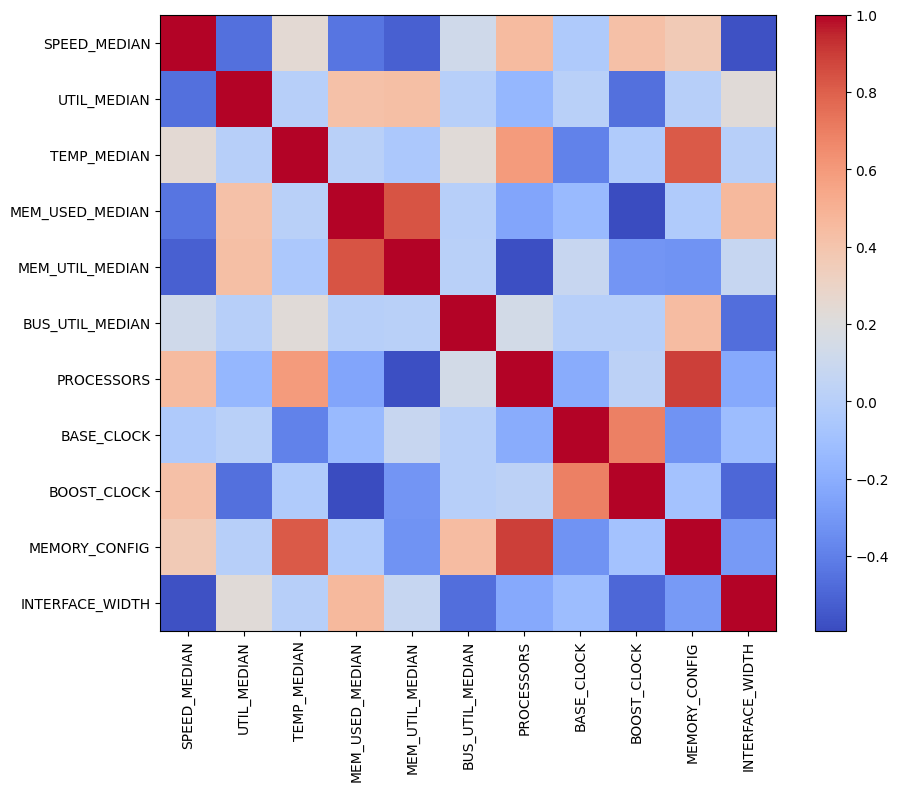

Median Correlation Matrix for CONFIG: dict2


,SPEED_MEDIAN,UTIL_MEDIAN,TEMP_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,BUS_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.152335,0.153379,-0.035499,0.000000,0.264906,0.396864,0.000000,0.490010,0.360722,-0.595925
UTIL_MEDIAN,-0.152335,1.000000,-0.162618,0.390410,0.173806,0.000000,-0.145995,0.000000,-0.495321,0.000000,0.309687
TEMP_MEDIAN,0.153379,-0.162618,1.000000,-0.036716,-0.710486,-0.087500,0.634397,-0.650929,-0.214211,0.567500,0.340674
MEM_USED_MEDIAN,-0.035499,0.390410,-0.036716,1.000000,0.556741,0.147889,-0.142238,-0.091216,-0.380686,0.001072,0.049558
MEM_UTIL_MEDIAN,0.000000,0.173806,-0.710486,0.556741,1.000000,0.248329,-0.634394,0.309460,0.000000,-0.558541,-0.044152
BUS_UTIL_MEDIAN,0.264906,0.000000,-0.087500,0.147889,0.248329,1.000000,0.131571,0.092511,0.265680,0.324835,-0.897354
PROCESSORS,0.396864,-0.145995,0.634397,-0.142238,-0.634394,0.131571,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.000000,0.000000,-0.650929,-0.091216,0.309460,0.092511,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.490010,-0.495321,-0.214211,-0.380686,0.000000,0.265680,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.360722,0.000000,0.567500,0.001072,-0.558541,0.324835,0.890509,-0.322779,-0.087469,1.000000,-0.292292


Correlation matrix shape for CONFIG: dict2 (11, 11)


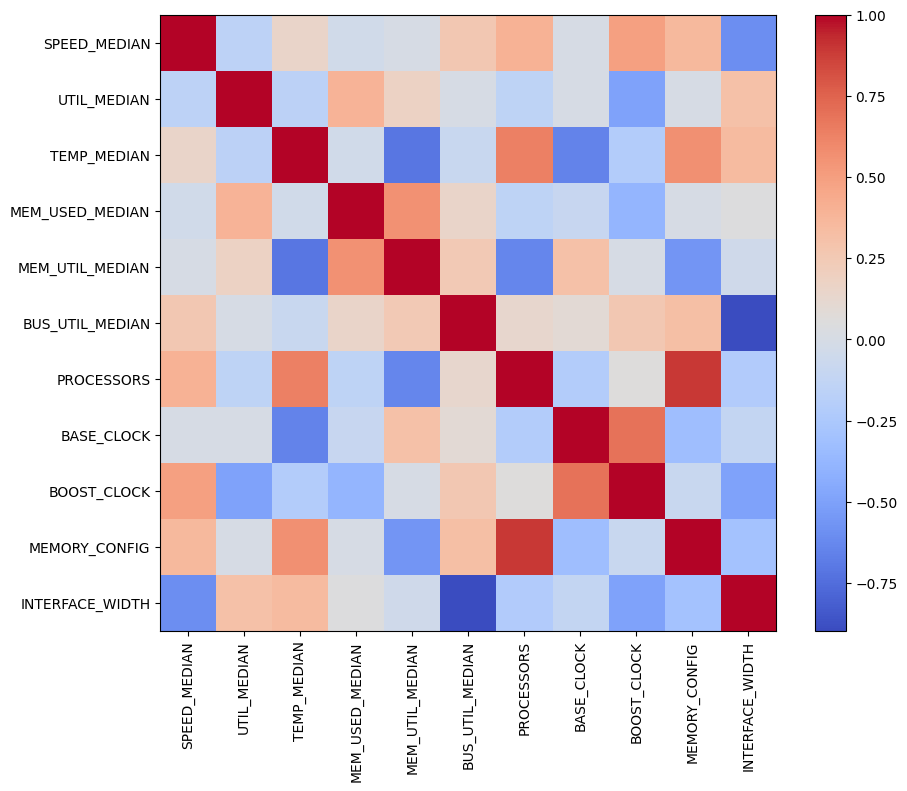

In [7]:
correlations_by_config = {}

# Calculate correlations for each file and store them in the respective CONFIG category
for file in files:
    path = os.path.join(folder, file)
    df = pd.read_csv(path, index_col=False)
    df = add_cols_to_df(df)

    # Group by "CONFIG" column
    grouped_configs = df.groupby("CONFIG")

    for config, df_group in grouped_configs:
        df_to_corr = df_group.iloc[:, 2:]

        # Select only median and GPU-related information columns
        median_gpu_cols = [col for col in df_to_corr.columns if 'MEDIAN' in col or col in ['GPU', 'PROCESSORS', 'BASE_CLOCK', 'BOOST_CLOCK', 'MEMORY_CONFIG', 'INTERFACE_WIDTH']]

        # Filter the dataframe to keep only the selected columns
        df_to_corr = df_to_corr[median_gpu_cols]

        # Fill NaN values with the median of each column
        df_to_corr = df_to_corr.fillna(df_to_corr.median())

        matrix = df_to_corr.corr()
        correlations_by_config.setdefault(config, []).append(matrix)

# Compute the median correlation for each CONFIG category
median_correlations_by_config = {}
for config, corr_list in correlations_by_config.items():
    if corr_list:  # Check if the list is not empty
        correlations_with_zeros = np.nan_to_num(np.stack(corr_list), nan=0)
        median_corr = np.median(correlations_with_zeros, axis=0)
        median_correlations_by_config[config] = median_corr

# Display both median correlation matrices and their corresponding plots
for config, median_corr in median_correlations_by_config.items():
    median_corr_df = pd.DataFrame(median_corr, columns=df_to_corr.columns, index=df_to_corr.columns)

    print(f"Median Correlation Matrix for CONFIG: {config}")
    display(median_corr_df.style.background_gradient(cmap='coolwarm'))

    print(f"Correlation matrix shape for CONFIG: {config}", median_corr.shape)

    plt.figure(figsize=(10, 8))
    plt.imshow(median_corr, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(len(df_to_corr.columns)), df_to_corr.columns, rotation=90)
    plt.yticks(np.arange(len(df_to_corr.columns)), df_to_corr.columns)
    plt.title(f'Median Correlation Matrix for CONFIG: {config}')
    plt.show()

Median Correlation Matrix for CONFIG: combinator


,SPEED_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.630916,-0.707168,0.808753,0.065268,0.470681,0.720805,-0.545684
MEM_USED_MEDIAN,-0.630916,1.000000,0.746451,-0.276823,-0.165027,-0.623740,-0.242180,0.883902
MEM_UTIL_MEDIAN,-0.707168,0.746451,1.000000,-0.688385,0.234496,-0.209036,-0.718013,0.394164
PROCESSORS,0.808753,-0.276823,-0.688385,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.065268,-0.165027,0.234496,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.470681,-0.623740,-0.209036,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.720805,-0.242180,-0.718013,0.890509,-0.322779,-0.087469,1.000000,-0.292292
INTERFACE_WIDTH,-0.545684,0.883902,0.394164,-0.221247,-0.116461,-0.490223,-0.292292,1.000000


Correlation matrix shape for CONFIG: combinator (8, 8)


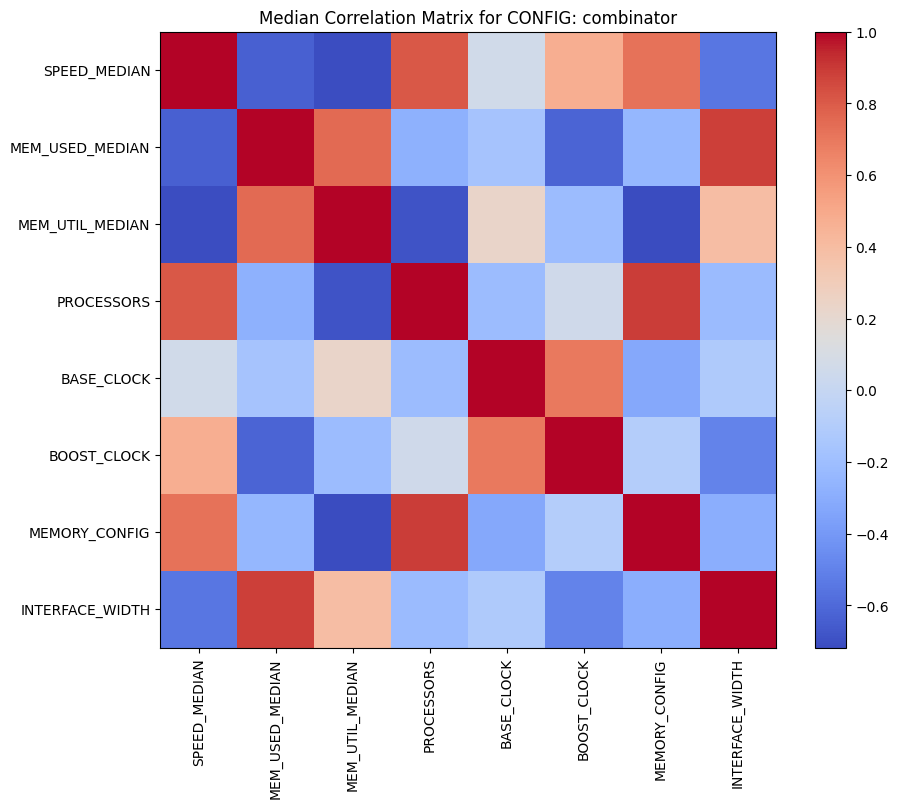

Median Correlation Matrix for CONFIG: dict3


,SPEED_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.240014,-0.400077,0.810588,0.046161,0.404787,0.741466,-0.434488
MEM_USED_MEDIAN,-0.240014,1.000000,0.264924,0.000000,-0.130090,-0.344881,0.000000,0.545433
MEM_UTIL_MEDIAN,-0.400077,0.264924,1.000000,-0.535304,0.194088,0.000000,-0.678036,0.000000
PROCESSORS,0.810588,0.000000,-0.535304,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.046161,-0.130090,0.194088,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.404787,-0.344881,0.000000,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.741466,0.000000,-0.678036,0.890509,-0.322779,-0.087469,1.000000,-0.292292
INTERFACE_WIDTH,-0.434488,0.545433,0.000000,-0.221247,-0.116461,-0.490223,-0.292292,1.000000


Correlation matrix shape for CONFIG: dict3 (8, 8)


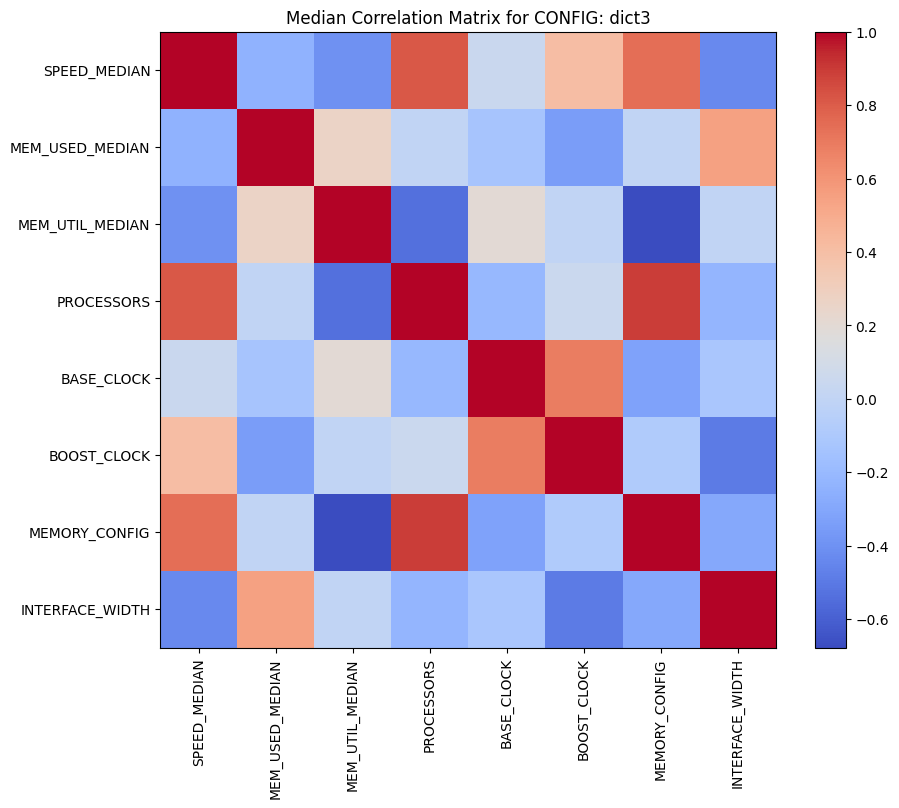

Median Correlation Matrix for CONFIG: dict4


,SPEED_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.494877,-0.599770,0.787236,0.167532,0.437342,0.725934,-0.543731
MEM_USED_MEDIAN,-0.494877,1.000000,0.808603,-0.086518,-0.196832,-0.557605,-0.127309,0.977544
MEM_UTIL_MEDIAN,-0.599770,0.808603,1.000000,-0.474928,0.105087,-0.230157,-0.620187,0.775369
PROCESSORS,0.787236,-0.086518,-0.474928,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.167532,-0.196832,0.105087,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.437342,-0.557605,-0.230157,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.725934,-0.127309,-0.620187,0.890509,-0.322779,-0.087469,1.000000,-0.292292
INTERFACE_WIDTH,-0.543731,0.977544,0.775369,-0.221247,-0.116461,-0.490223,-0.292292,1.000000


Correlation matrix shape for CONFIG: dict4 (8, 8)


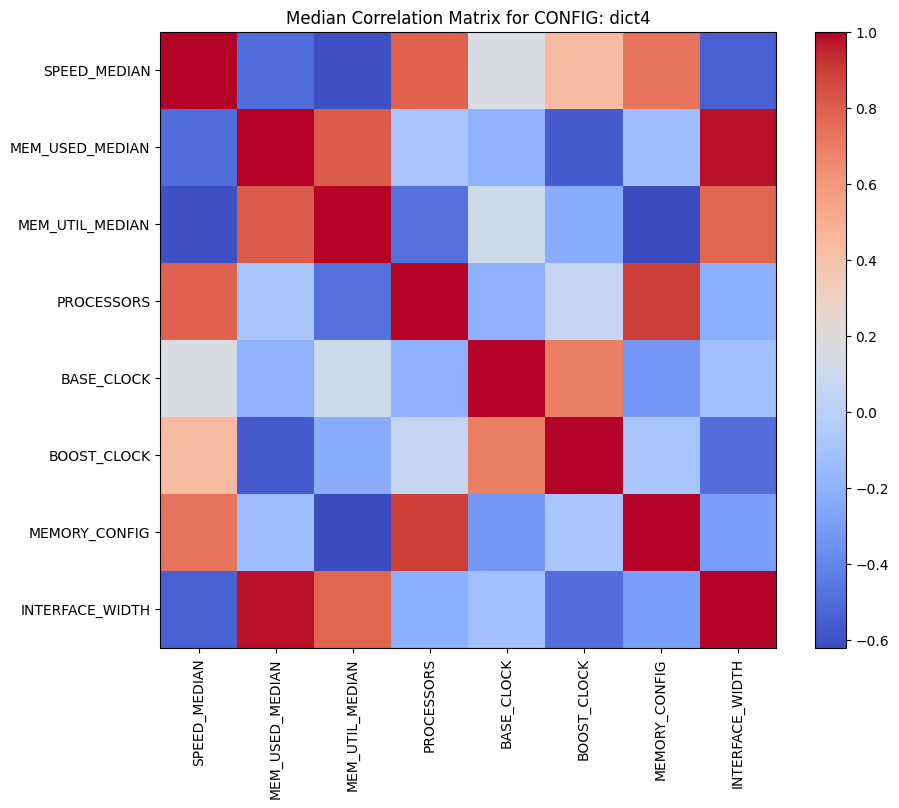

Median Correlation Matrix for CONFIG: force


,SPEED_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.261964,-0.277006,0.757145,0.000000,0.448279,0.624412,-0.409669
MEM_USED_MEDIAN,-0.261964,1.000000,0.820087,-0.192377,-0.170896,-0.518242,-0.131255,0.544107
MEM_UTIL_MEDIAN,-0.277006,0.820087,1.000000,-0.302357,0.000000,-0.110923,-0.365814,0.140001
PROCESSORS,0.757145,-0.192377,-0.302357,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.000000,-0.170896,0.000000,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.448279,-0.518242,-0.110923,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.624412,-0.131255,-0.365814,0.890509,-0.322779,-0.087469,1.000000,-0.292292
INTERFACE_WIDTH,-0.409669,0.544107,0.140001,-0.221247,-0.116461,-0.490223,-0.292292,1.000000


Correlation matrix shape for CONFIG: force (8, 8)


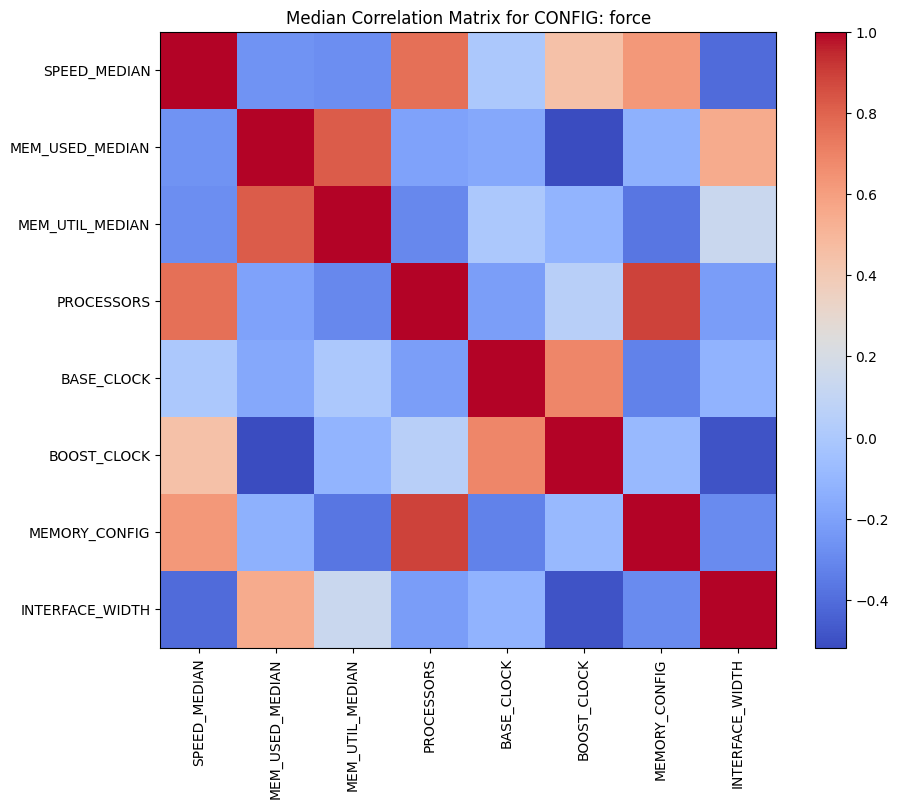

Median Correlation Matrix for CONFIG: hybrid


,SPEED_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.457953,-0.571464,0.800311,0.005909,0.499362,0.668831,-0.452906
MEM_USED_MEDIAN,-0.457953,1.000000,0.863387,-0.156009,-0.211784,-0.582185,-0.158786,0.920491
MEM_UTIL_MEDIAN,-0.571464,0.863387,1.000000,-0.429367,-0.019922,-0.369002,-0.446813,0.732072
PROCESSORS,0.800311,-0.156009,-0.429367,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.005909,-0.211784,-0.019922,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.499362,-0.582185,-0.369002,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.668831,-0.158786,-0.446813,0.890509,-0.322779,-0.087469,1.000000,-0.292292
INTERFACE_WIDTH,-0.452906,0.920491,0.732072,-0.221247,-0.116461,-0.490223,-0.292292,1.000000


Correlation matrix shape for CONFIG: hybrid (8, 8)


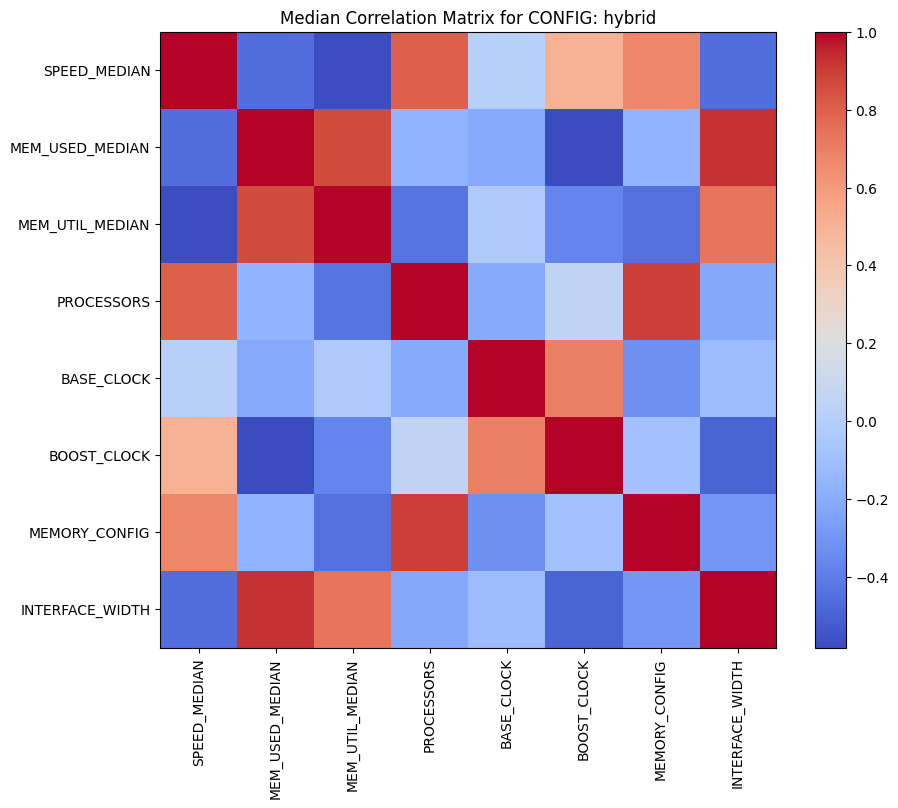

Median Correlation Matrix for CONFIG: dict1


,SPEED_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.441628,-0.513873,0.451343,-0.038073,0.425273,0.360722,-0.571570
MEM_USED_MEDIAN,-0.441628,1.000000,0.837463,-0.244661,-0.135074,-0.593737,-0.032485,0.460146
MEM_UTIL_MEDIAN,-0.513873,0.837463,1.000000,-0.576430,0.079337,-0.310234,-0.322193,0.075034
PROCESSORS,0.451343,-0.244661,-0.576430,1.000000,-0.210624,0.027636,0.890509,-0.221247
BASE_CLOCK,-0.038073,-0.135074,0.079337,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.425273,-0.593737,-0.310234,0.027636,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.360722,-0.032485,-0.322193,0.890509,-0.322779,-0.087469,1.000000,-0.292292
INTERFACE_WIDTH,-0.571570,0.460146,0.075034,-0.221247,-0.116461,-0.490223,-0.292292,1.000000


Correlation matrix shape for CONFIG: dict1 (8, 8)


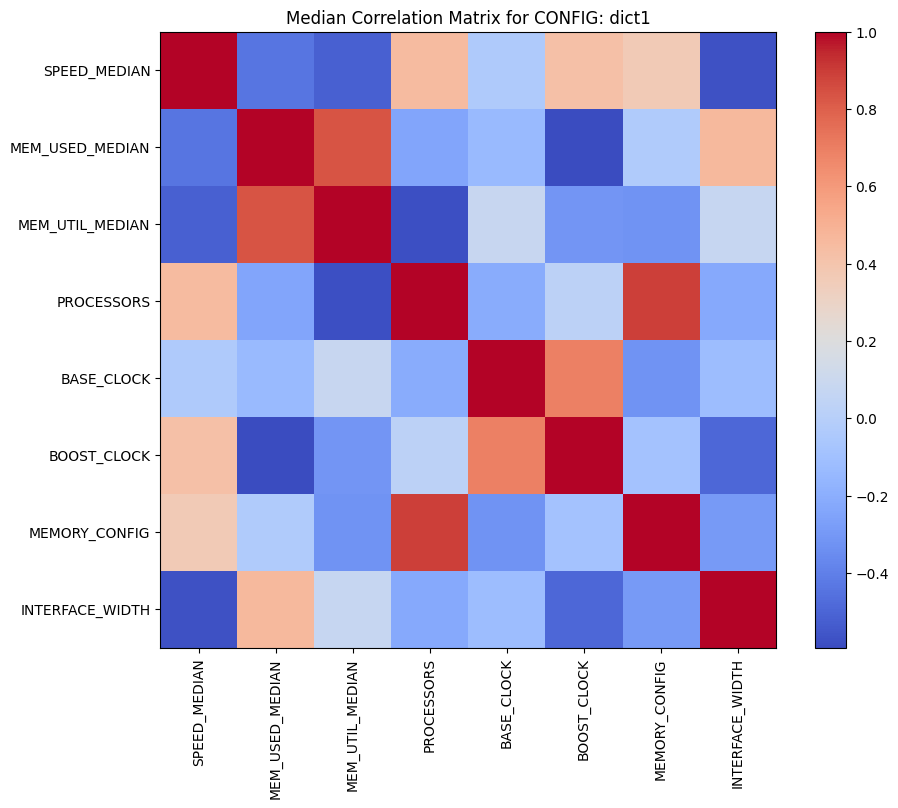

Median Correlation Matrix for CONFIG: dict2


,SPEED_MEDIAN,MEM_USED_MEDIAN,MEM_UTIL_MEDIAN,PROCESSORS,BASE_CLOCK,BOOST_CLOCK,MEMORY_CONFIG,INTERFACE_WIDTH
SPEED_MEDIAN,1.000000,-0.035499,0.000000,0.396864,0.000000,0.490010,0.360722,-0.595925
MEM_USED_MEDIAN,-0.035499,1.000000,0.556741,-0.142238,-0.091216,-0.380686,0.001072,0.049558
MEM_UTIL_MEDIAN,0.000000,0.556741,1.000000,-0.634394,0.309460,0.000000,-0.558541,-0.044152
PROCESSORS,0.396864,-0.142238,-0.634394,1.000000,-0.210624,0.055271,0.890509,-0.221247
BASE_CLOCK,0.000000,-0.091216,0.309460,-0.210624,1.000000,0.691414,-0.322779,-0.116461
BOOST_CLOCK,0.490010,-0.380686,0.000000,0.055271,0.691414,1.000000,-0.087469,-0.490223
MEMORY_CONFIG,0.360722,0.001072,-0.558541,0.890509,-0.322779,-0.087469,1.000000,-0.292292
INTERFACE_WIDTH,-0.595925,0.049558,-0.044152,-0.221247,-0.116461,-0.490223,-0.292292,1.000000


Correlation matrix shape for CONFIG: dict2 (8, 8)


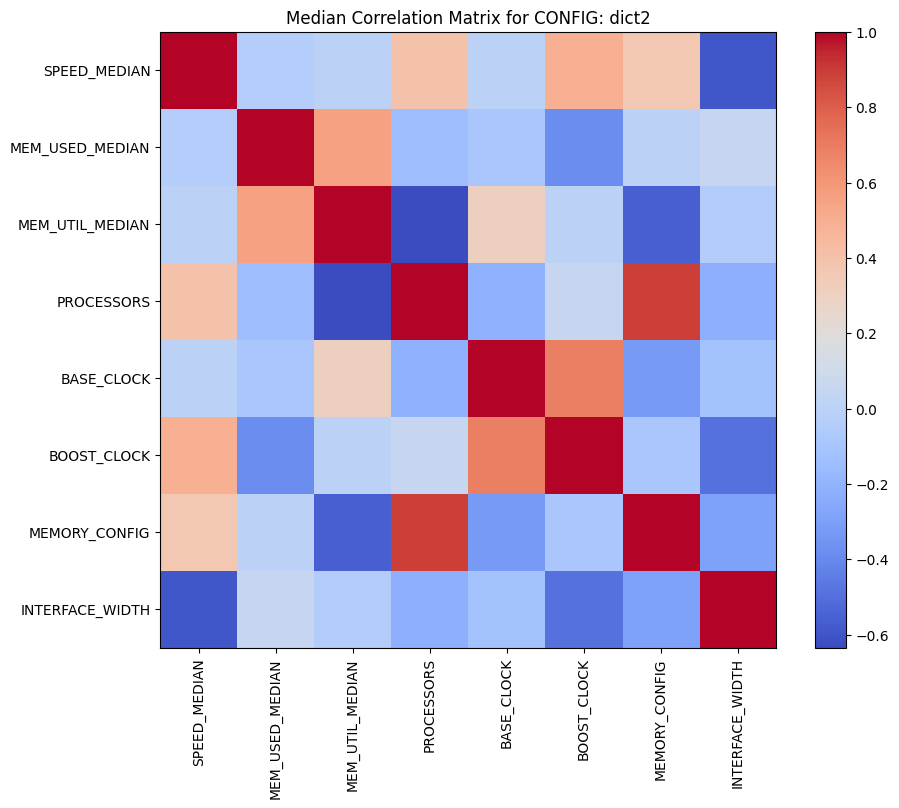

In [6]:
correlations_by_config = {}

# Calculate correlations for each file and store them in the respective CONFIG category
for file in files:
    path = os.path.join(folder, file)
    df = pd.read_csv(path, index_col=False)
    df = add_cols_to_df(df)

    # Group by "CONFIG" column
    grouped_configs = df.groupby("CONFIG")

    for config, df_group in grouped_configs:
        df_to_corr = df_group.iloc[:, 2:]

        # Select only the desired columns
        selected_columns = ['SPEED_MEDIAN', 'MEM_USED_MEDIAN', 'MEM_UTIL_MEDIAN', 'PROCESSORS', 'BASE_CLOCK', 'BOOST_CLOCK', 'MEMORY_CONFIG', 'INTERFACE_WIDTH']
        df_to_corr = df_to_corr[selected_columns]

        # Fill NaN values with the median of each column
        df_to_corr = df_to_corr.fillna(df_to_corr.median())

        matrix = df_to_corr.corr()
        correlations_by_config.setdefault(config, []).append(matrix)


# Compute the median correlation for each CONFIG category
median_correlations_by_config = {}
for config, corr_list in correlations_by_config.items():
    if corr_list:  # Check if the list is not empty
        correlations_with_zeros = np.nan_to_num(np.stack(corr_list), nan=0)
        median_corr = np.median(correlations_with_zeros, axis=0)
        median_correlations_by_config[config] = median_corr

# Display both median correlation matrices and their corresponding plots
for config, median_corr in median_correlations_by_config.items():
    median_corr_df = pd.DataFrame(median_corr, columns=df_to_corr.columns, index=df_to_corr.columns)

    print(f"Median Correlation Matrix for CONFIG: {config}")
    display(median_corr_df.style.background_gradient(cmap='coolwarm'))

    print(f"Correlation matrix shape for CONFIG: {config}", median_corr.shape)

    plt.figure(figsize=(10, 8))
    plt.imshow(median_corr, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(len(df_to_corr.columns)), df_to_corr.columns, rotation=90)
    plt.yticks(np.arange(len(df_to_corr.columns)), df_to_corr.columns)
    plt.title(f'Median Correlation Matrix for CONFIG: {config}')
    plt.show()